# Combine data

In [104]:
import pandas as pd
import os
import numpy as np
from itertools import product
from shapely.geometry import LinearRing, Polygon, Point, LineString
import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib inline

pickles = '../data/pickles/'

# Read Pickle Files

In [4]:
os.listdir(pickles)

['bathymetry.pkl',
 'ca_counties.pkl',
 'crit_species.pkl',
 'kelp_biomass.pkl',
 'mpa.pkl',
 'nes_occupation.pkl',
 'qcew_occupation.pkl',
 'sst_ca.pkl']

In [65]:
#Pickle files come from data/read_data.ipynb and
#bathymetry is not a gpd df
bathymetry = pd.read_pickle(pickles+'bathymetry.pkl')
bathymetry.head()

,x,y,z
0,-128.0,37.000000,NaN
1,-128.0,37.000833,NaN
2,-128.0,37.001667,NaN
3,-128.0,37.002500,NaN
4,-128.0,37.003333,NaN


In [66]:
#in lon, lat format
ca_counties = pd.read_pickle(pickles+'ca_counties.pkl')

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,6,75,00277302,0500000US06075,06075,San Francisco,06,121485107,479107241,"POLYGON ((-122.511983 37.77113, -122.465396 37..."
705,6,87,00277308,0500000US06087,06087,Santa Cruz,06,1152967426,419570389,"POLYGON ((-122.317682 37.186945, -122.152774 3..."
713,6,31,00277280,0500000US06031,06031,Kings,06,3598593366,5453080,"POLYGON ((-120.315068 35.907186, -119.959058 3..."
899,6,85,00277307,0500000US06085,06085,Santa Clara,06,3344209919,33276429,"POLYGON ((-122.190402 37.431472, -122.144933 3..."
915,6,21,00277275,0500000US06021,06021,Glenn,06,3403149421,33704225,"POLYGON ((-122.911794 39.799485, -122.046471 3..."


In [78]:
#in lon lat format except for leatherbacks which is all messed up
crit_species = pd.read_pickle(pickles+'crit_species.pkl')
for i in crit_species.keys():
    print(i)
    print(type(crit_species[i]))
crit_species['leatherback'].geometry

black_abalone
<class 'geopandas.geodataframe.GeoDataFrame'>
leatherback
<class 'geopandas.geodataframe.GeoDataFrame'>
stellar_sealions
<class 'geopandas.geodataframe.GeoDataFrame'>
green_sturgeon
<class 'geopandas.geodataframe.GeoDataFrame'>


0    (POLYGON ((-373068.5689000003 112824.739399999...
Name: geometry, dtype: object

In [86]:
#in lat lon format
protected_areas = pd.read_pickle(pickles+'mpa.pkl')
protected_areas = gpd.GeoDataFrame(protected_areas, crs = {'init' :'epsg:4326'}, geometry='Geometry')
print(protected_areas.head())
#protected_areas.exterior.coords

                                                Name  \
0       Pyramid Point State Marine Conservation Area   
1  Point St. George Reef Offshore State Marine Co...   
2                Southwest Seal Rock Special Closure   
3                        Castle Rock Special Closure   
4                 False Klamath Rock Special Closure   

                                            Geometry  
0  POLYGON ((42 -124.21225, 42 -124.330233, 41.95...  
1  POLYGON ((41.866667 -124.3864833, 41.86667 -12...  
2                         POINT (41.8136 -124.35165)  
3                       POINT (41.761767 -124.24915)  
4                       POINT (41.593883 -124.11165)  


In [170]:
#we will need to convert some geometries from lat, lon to lon,lat
def flip_coords(geom):
    if type(geom) == Polygon:
        coords = geom.exterior.coords.xy 
        geomtype = 'Polygon'
    elif type(geom) == LineString:
        coords = geom.coords.xy
        geomtype = 'LineString'
    elif type(geom) == Point:
        coords = geom.coords.xy
        geomtype = 'Point'
    else:
        print("not a known geom type")
        return 
    flipped_coords = list(zip(coords[1],coords[0]))
    if geomtype == 'Polygon':
        return Polygon(flipped_coords) 
    elif geomtype == 'LineString':
        return LineString(flipped_coords)
    elif geomtype == 'Point':
        return Point(flipped_coords)

[(0.0, 0.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0)]
[(0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0)]
[array('d', [0.0, 5.0, 4.0]), array('d', [0.0, 5.0, 2.0])]
[array('d', [4.0]), array('d', [2.0])]
orig coords (array('d', [4.0]), array('d', [2.0]))
flipped coords [(2.0, 4.0)]


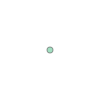

In [178]:
a =Polygon([(0,0),(1,1),(0,1)])
print(list(zip(a.exterior.coords.xy[0],a.exterior.coords.xy[1])))
print(list(zip(a.exterior.coords.xy[1],a.exterior.coords.xy[0])))
b = LineString([(0,0),(5,5),(4,2)])
print(list(b.coords.xy))
c = Point((4,2))
print(list(c.coords.xy))
flip_coords(c)
c

In [80]:
occupation_nes = pd.read_pickle(pickles+'nes_occupation.pkl')
occupation_nes.head()

,estab,estab_f,naics,year,State,fips_state,fips_county,name,STATE,COUNTY,STNAME,CTYNAME,population,pct
0,42,NaN,11411,2010,CA,6,1,Alameda County,6,1,California,Alameda County,1513402,0.000028
1,71,NaN,11411,2011,CA,6,1,Alameda County,6,1,California,Alameda County,1532215,0.000046
2,63,NaN,11411,2012,CA,6,1,Alameda County,6,1,California,Alameda County,1556648,0.000040
3,65,NaN,11411,2013,CA,6,1,Alameda County,6,1,California,Alameda County,1582936,0.000041
4,64,NaN,11411,2014,CA,6,1,Alameda County,6,1,California,Alameda County,1611572,0.000040


In [81]:
occupation_qcew = pd.read_pickle(pickles+'qcew_occupation.pkl')
occupation_qcew.head()

,area_fips,industry_code,agglvl_code,size_code,year,disclosure_code,annual_avg_estabs,annual_avg_emplvl,fips_county,fips_state,State,name,fips_class_code,STATE,COUNTY,STNAME,CTYNAME,population,estab_pct,emp_pct
0,06007,11251,77,0,2013,N,1,0,7,6,CA,Butte County,H1,6,7,California,Butte County,221768,0.000005,0.000000
1,06015,11251,77,0,2013,N,1,0,15,6,CA,Del Norte County,H1,6,15,California,Del Norte County,27830,0.000036,0.000000
2,06015,11411,77,0,2013,NaN,39,81,15,6,CA,Del Norte County,H1,6,15,California,Del Norte County,27830,0.001401,0.002911
3,06019,11251,77,0,2013,N,4,0,19,6,CA,Fresno County,H1,6,19,California,Fresno County,953787,0.000004,0.000000
4,06023,11251,77,0,2013,NaN,6,19,23,6,CA,Humboldt County,H1,6,23,California,Humboldt County,134444,0.000045,0.000141


In [82]:
#in lat lon format
kelp_biomass =pd.read_pickle(pickles+'kelp_biomass.pkl')
kelp_biomass.head()

,lat,lon,biomass,geometry
0,32.519277,-117.142836,265.0,POINT (32.51927713 -117.1428356)
1,32.519547,-117.143155,635.0,POINT (32.5195474 -117.1431554)
2,32.519548,-117.142836,275.0,POINT (32.51954776 -117.142836)
3,32.519548,-117.142197,272.0,POINT (32.51954849 -117.1421972)
4,32.519818,-117.143156,565.0,POINT (32.51981803 -117.1431559)


In [83]:
#will be converted to lon lat format
sst = pd.read_pickle(pickles+'sst_ca.pkl')
sst.head()

,lat_bnds,lon_bnds,lat,lon,analysed_sst,max_temp,min_temp
699105,31.25,-124.75,31.25,-124.75,16.904609,19.409998,15.029993
699106,31.25,-124.50,31.25,-124.50,16.886531,19.200006,15.059991
699107,31.25,-124.25,31.25,-124.25,16.896147,18.969995,15.149988
699108,31.25,-124.00,31.25,-124.00,16.901529,18.829980,15.219995
699109,31.25,-123.75,31.25,-123.75,16.878454,18.809991,15.049982


# Create grid of California

In [23]:
def squarify(point, increment):
    return Polygon([(point[0], point[1]),
     (point[0] + increment, point[1]), 
     (point[0] + increment, point[1] + increment), 
     (point[0], point[1] + increment)])

def desquarify(left_vertices, right_vertices, square_length):
    x_num = round((right_vertices[0] - left_vertices[0])/square_length, 0)
    y_num = round((right_vertices[1] - left_vertices[1])/square_length, 0)
    x_lengths = np.linspace(left_vertices[0], right_vertices[0]-square_length, x_num)
    y_lengths = np.linspace(left_vertices[1], right_vertices[1]-square_length, y_num)
    return [p for p in product(x_lengths, y_lengths)]

In [36]:
#create vertices for California
#roughly the bounds of california going out 8km past cape mendocino
width = .1
grid_bottomleft_vertices = desquarify((32.534343,-124.511849),(42.00,-117.123885), width)
grid = [squarify(i, width) for i in grid_bottomleft_vertices]

/home/clay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # Remove the CWD from sys.path while we load stuff.
/home/clay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


[(32.534343, -124.511849), (32.534343, -124.41201387671232), (32.534343, -124.31217875342466)]
POLYGON ((32.534343 -124.511849, 32.634343 -124.511849, 32.634343 -124.411849, 32.534343 -124.411849, 32.534343 -124.511849))


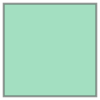

In [37]:
print(grid_bottomleft_vertices[:3])
print(grid[0])
grid[0]

In [40]:
grid_df = gpd.GeoDataFrame(geometry=grid, crs = {'init' : 'epsg:4326'})
grid_df["polygon_id"] = range(len(grid))

# Combine Data

0      POLYGON ((-122.511983 37.77113, -122.465396 37...
705    POLYGON ((-122.317682 37.186945, -122.152774 3...
713    POLYGON ((-120.315068 35.907186, -119.959058 3...
Name: geometry, dtype: object


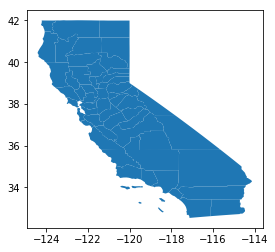

In [63]:
print(ca_counties.geometry[0:3])
ca_counties.plot()

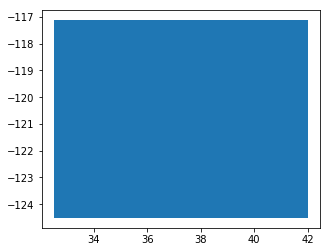

In [48]:
grid_df.plot()